In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


 **Knowing the Dataset**

In [2]:
%%time
DATASET_COLUMNS = ["label", "ids", "date", "flag", "user", "tweet"]
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding =DATASET_ENCODING , names=DATASET_COLUMNS)
df.head()

CPU times: user 4.17 s, sys: 401 ms, total: 4.57 s
Wall time: 6.97 s


,label,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
%%time
df.drop(['ids','date','flag','user'],axis=1,inplace=True)

CPU times: user 28.6 ms, sys: 4.79 ms, total: 33.4 ms
Wall time: 33.5 ms


In [4]:
%%time
df.head()

CPU times: user 129 µs, sys: 20 µs, total: 149 µs
Wall time: 153 µs


,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


CPU times: user 445 ms, sys: 414 ms, total: 859 ms
Wall time: 1.19 s


<AxesSubplot:xlabel='label', ylabel='count'>

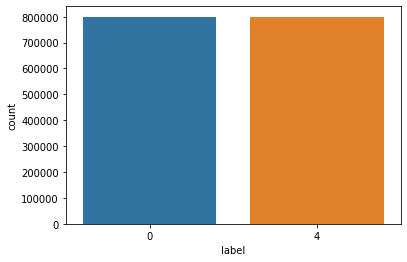

In [5]:
%%time
import seaborn as s
s.countplot(x='label',data=df)

In [6]:
df

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
%%time
df['label'].unique()

CPU times: user 7.72 ms, sys: 940 µs, total: 8.66 ms
Wall time: 8.14 ms


array([0, 4])

In [8]:
%%time
df["label"].replace({4:1}, inplace=True)

CPU times: user 3.45 ms, sys: 896 µs, total: 4.35 ms
Wall time: 3.81 ms


In [9]:
%%time
df

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


In [10]:
%%time
df.isnull().sum()

CPU times: user 87.3 ms, sys: 2.09 ms, total: 89.4 ms
Wall time: 87.5 ms


label    0
tweet    0
dtype: int64

In [11]:
# df['tweet'] = df['tweet'].apply(str)
# df['label'] = df['label'].apply(str)

In [12]:
df.shape

(1600000, 2)

In [13]:
df.describe()

,label
count,1600000.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


**Pre-Processing**

In [14]:
%%time
df.head()

CPU times: user 117 µs, sys: 22 µs, total: 139 µs
Wall time: 143 µs


,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


converting to Lower Case

In [15]:
# df["tweet"]=df["tweet"].str.lower()
df.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


Remove URLs

In [16]:
df.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [17]:
df['tweet'].dtype

dtype('O')

In [18]:
df['label'].dtype

dtype('int64')

In [19]:
%%time
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
{'their', 'which', 'of', 'what', 'shouldn', "should've", "haven't", 'where', 'only', 'with', 'those', 'have', 'over', 'here', "wasn't", 'than', "you'll", 'did', 'having', 'been', 'no', 'down', 'this', 'as', "mustn't", 'or', 'm', 'between', 'its', 'against', "won't", 'couldn', 'isn', 'were', 'but', 'most', 'few', "doesn't", 'does', 'under', 'in', 'weren', 'them', 'they', 'is', 'myself', 'can', 'themselves', 'shan', 'more', 'up', 'hasn', 'an', 'your', 'further', 'mustn', 'am', 'doing', 'just', "hadn't", 'his', 'ma', 'both', 'now', 'and', 'hadn', 'any', 'very', "don't", 'needn', 'it', 'itself', 'ours', 'we', 'aren', 'll', 'above', 'because', 'will', "isn't", 'yourself', "you're", 'whom', 'so', 'she', 'my', 'you', 'while', 'him', 'again', "hasn't", 'be', "didn't", 'the', "couldn't", "shan't", 'wasn', 'then', 'being', 'herself', 'yours', "it's", 'below', 'if', "wouldn't", 'wa

In [20]:
# %%time
# nltk.download('punkt')
# nltk.download('wordnet')

In [21]:
import string

In [22]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [23]:
%%time
import re
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
#Conversion of emoticons to words
#
def process_tweets(tweet):
    # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[0:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    for emot in EMOTICONS:
        tweet = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
        if len(w)>1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    return ' '.join(finalwords)

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 9.3 µs


In [24]:
%%time
df['label'] = df['label'].apply(str)

CPU times: user 270 ms, sys: 38.8 ms, total: 308 ms
Wall time: 308 ms


In [25]:
%%time
df = df.sample(frac=1)
df = df[:200000]

CPU times: user 880 ms, sys: 26 ms, total: 906 ms
Wall time: 904 ms


In [26]:
%%time
df

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


,label,tweet
1037389,1,Cant wait ti'll my birthday this sunday!!!! I'...
725660,0,@StacyBurke we r flying around as usual. Ray i...
264225,0,@jarred0627 does that mean we're over?
1200055,1,I. Hate. Sidney. Crosby. GO WINGS!!
989233,1,@Boyzonetour09 cant wait til glasgow on the 12...
...,...,...
790308,0,@mattian that's for two tyres. Sharp objects i...
421756,0,Listening To Sad Paramore Songs. I Love Hayley...
1106854,1,Getting excited to see RENT tomorrow
468226,0,"@jonknightswife hey Ems, you left so suddenly ..."


In [27]:
%%time
df['temp'] = df['tweet'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.
CPU times: user 2min 2s, sys: 187 ms, total: 2min 2s
Wall time: 2min 2s


In [28]:
df

,label,tweet,temp
1037389,1,Cant wait ti'll my birthday this sunday!!!! I'...,cant wait till birthday sunday im getting firs...
725660,0,@StacyBurke we r flying around as usual. Ray i...,flying around usual ray bday sure doargConfusi...
264225,0,@jarred0627 does that mean we're over?,mean
1200055,1,I. Hate. Sidney. Crosby. GO WINGS!!,hate sidney crosby go wing
989233,1,@Boyzonetour09 cant wait til glasgow on the 12...,cant wait til glasgow 12th june xxxxx
...,...,...,...
790308,0,@mattian that's for two tyres. Sharp objects i...,thats two tyre sharp object front shredded fro...
421756,0,Listening To Sad Paramore Songs. I Love Hayley...,listening sad paramore song love hayleys voice...
1106854,1,Getting excited to see RENT tomorrow,getting excited see rent tomorrow
468226,0,"@jonknightswife hey Ems, you left so suddenly ...",hey em left suddenly saturdaydidnt get say bye ya


In [29]:
%%time
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


# tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

CPU times: user 2.48 s, sys: 872 ms, total: 3.35 s
Wall time: 8.32 s


In [30]:
X = df['temp'].values
y = df['label'].values

In [31]:
# words = ''.join(str(df['temp'].tolist()))
# words

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=101)

In [33]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (140000,)
y_train (140000,)

X_test (60000,)
y_test (60000,)


In [34]:
vector = TfidfVectorizer(ngram_range=(1,2),sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names()))

Vector fitted.
No. of feature_words:  852561


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=101)

In [36]:
%%time
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs


Accuracy of model on training data : 87.96285714285715
Accuracy of model on testing data : 77.66666666666666 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     30031
           1       0.76      0.81      0.78     29969

    accuracy                           0.78     60000
   macro avg       0.78      0.78      0.78     60000
weighted avg       0.78      0.78      0.78     60000

CPU times: user 20.3 s, sys: 24.3 s, total: 44.6 s
Wall time: 17 s


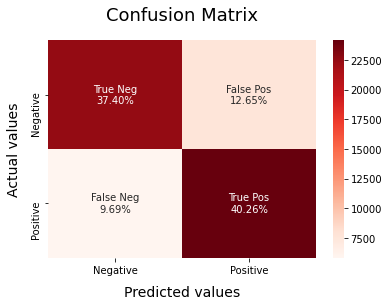

In [37]:
%%time
lg = LogisticRegression(max_iter=1000)
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

Accuracy of model on training data : 98.88214285714285
Accuracy of model on testing data : 77.35333333333332 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     30031
           1       0.76      0.80      0.78     29969

    accuracy                           0.77     60000
   macro avg       0.77      0.77      0.77     60000
weighted avg       0.77      0.77      0.77     60000



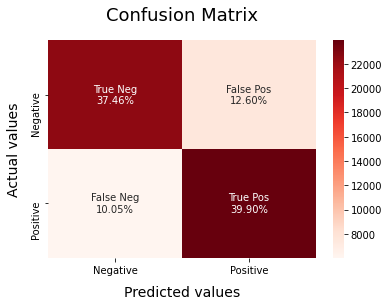

In [38]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

Accuracy of model on training data : 73.27142857142857
Accuracy of model on testing data : 69.33666666666667 

              precision    recall  f1-score   support

           0       0.76      0.56      0.65     30031
           1       0.65      0.83      0.73     29969

    accuracy                           0.69     60000
   macro avg       0.71      0.69      0.69     60000
weighted avg       0.71      0.69      0.69     60000



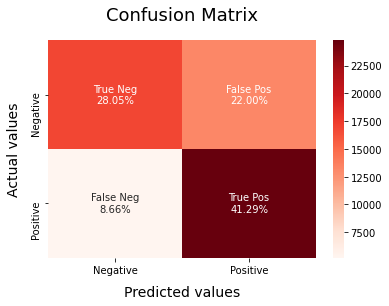

In [39]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

Accuracy of model on training data : 94.57642857142858
Accuracy of model on testing data : 76.105 

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     30031
           1       0.74      0.81      0.77     29969

    accuracy                           0.76     60000
   macro avg       0.76      0.76      0.76     60000
weighted avg       0.76      0.76      0.76     60000



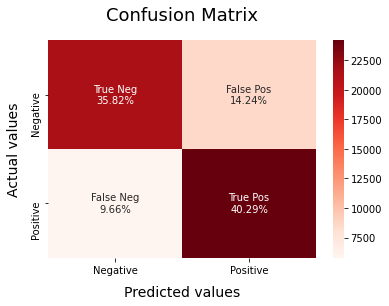

In [40]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

Accuracy of model on training data : 53.331428571428575
Accuracy of model on testing data : 52.98500000000001 

              precision    recall  f1-score   support

           0       0.89      0.07      0.13     30031
           1       0.52      0.99      0.68     29969

    accuracy                           0.53     60000
   macro avg       0.70      0.53      0.40     60000
weighted avg       0.70      0.53      0.40     60000

CPU times: user 1min 6s, sys: 9.14 ms, total: 1min 6s
Wall time: 1min 6s


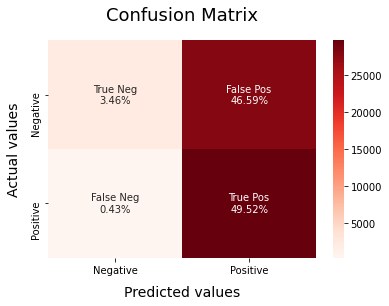

In [41]:
%%time
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=13)
clf_tree.fit(X_train,y_train)
model_Evaluate(clf_tree)

Accuracy of model on training data : 92.30714285714285
Accuracy of model on testing data : 76.96499999999999 

              precision    recall  f1-score   support

           0       0.82      0.69      0.75     30031
           1       0.73      0.85      0.79     29969

    accuracy                           0.77     60000
   macro avg       0.78      0.77      0.77     60000
weighted avg       0.78      0.77      0.77     60000

CPU times: user 2min 58s, sys: 25.8 s, total: 3min 24s
Wall time: 2min 55s


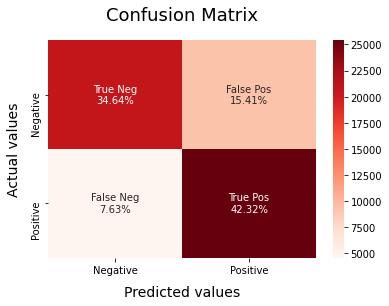

In [47]:
%%time
from sklearn.ensemble import VotingClassifier
Ens = VotingClassifier( estimators= [('LG',lg),('SVM',svm),('RF',rf),('NB',nb),('DT',clf_tree)], voting = 'hard')
Ens.fit(X_train , y_train)
model_Evaluate(Ens)

Accuracy of model on training data : 94.11142857142856
Accuracy of model on testing data : 77.22 

              precision    recall  f1-score   support

           0       0.79      0.74      0.76     30031
           1       0.75      0.81      0.78     29969

    accuracy                           0.77     60000
   macro avg       0.77      0.77      0.77     60000
weighted avg       0.77      0.77      0.77     60000

CPU times: user 2min 36s, sys: 23.8 s, total: 3min
Wall time: 2min 32s


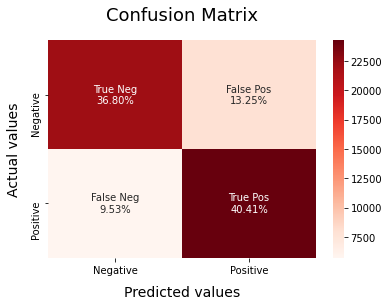

In [43]:
%%time
from sklearn.ensemble import VotingClassifier
Ens = VotingClassifier(  estimators= [('LG',lg),('RF',rf),('NB',nb),('DT',clf_tree)], voting = 'soft')
Ens.fit(X_train , y_train)
model_Evaluate(Ens)

In [44]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train,y_train)
# model_Evaluate(knn)

In [45]:
# from xgboost import XGBRegressor
# my_model = XGBRegressor()
# my_model.fit(X_train, y_train,verbose=False)
# model_Evaluate(my_model)